Use Autoencoder to implement anomaly detection. Build the model by using: 
a. Import required libraries 
b. Upload / access the dataset 
c. Encoder converts it into latent representation 
d. Decoder networks convert it back to the original input 
e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  accuracy_score

In [2]:
df = pd.read_csv('E:/DL/datasets/ecg.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
features = df.drop(140,axis=1)
target = df[140]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,stratify=target)

In [7]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
4911,-0.696774,-1.784206,-2.317976,-2.860266,-2.788727,-2.604624,-2.242026,-1.888752,-1.344906,-0.728823,...,-1.298966,-1.849648,-2.376260,-3.100596,-3.898439,-4.055638,-3.539748,-2.231336,-1.572548,-0.385702
1568,-2.160022,-3.777751,-4.285004,-4.036477,-3.308024,-2.133143,-1.523664,-1.452375,-0.682550,-0.404657,...,1.182154,1.105107,1.384214,1.575143,1.506016,1.170609,0.758034,0.633479,0.871299,0.149151
4267,0.166551,-0.541230,-1.280167,-1.973996,-2.708232,-3.315489,-3.360523,-3.087480,-2.660147,-1.960666,...,-1.306763,-1.958547,-2.713072,-3.242247,-3.222434,-2.509014,-1.676217,-0.686822,-0.292554,-0.224739
4861,-0.790029,-2.401475,-3.075281,-3.419446,-4.054297,-4.258336,-3.123413,-2.089085,-1.541706,-1.501475,...,2.638176,2.662544,1.740442,1.478123,0.691055,0.240743,-0.286626,-1.213277,-1.288718,-1.036157
2879,1.461370,-0.990853,-2.499753,-3.480855,-4.242946,-3.788871,-2.447214,-1.533073,-1.170259,-0.369150,...,0.717373,1.729889,2.137479,2.115189,2.297731,2.155187,1.919944,0.796177,0.726285,0.844392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,0.390650,-0.877697,-1.709390,-2.457281,-3.056923,-2.938749,-2.598243,-1.770561,-1.152768,-0.986120,...,-1.022654,-1.547106,-2.072980,-2.459351,-3.039604,-3.820861,-3.919864,-2.730319,-1.142589,-0.179471
407,-0.582058,-1.779584,-2.671976,-3.433137,-3.443102,-3.186894,-2.885764,-2.560716,-2.036573,-1.452180,...,-0.884393,-1.403266,-2.031548,-2.656638,-2.944688,-2.763151,-2.053038,-0.906706,0.186531,0.973449
1539,-2.151461,-3.325809,-3.775551,-4.168292,-4.168483,-3.855752,-2.614968,-1.440070,-1.138878,-0.614108,...,1.097374,1.329788,1.634628,1.247331,0.535793,-0.353276,-0.760097,-0.626096,-0.548389,-1.770594
1494,-0.532116,-1.800088,-2.554639,-3.614720,-4.065729,-3.549602,-2.700206,-1.858430,-1.534015,-1.356696,...,1.610027,1.244143,0.702566,-0.208854,-1.077645,-1.468265,-1.416400,-1.066942,-0.435365,-0.901686


In [8]:
y_train

4911    0.0
1568    1.0
4267    0.0
4861    0.0
2879    1.0
       ... 
4713    0.0
407     0.0
1539    1.0
1494    1.0
3506    0.0
Name: 140, Length: 3998, dtype: float64

In [9]:
train_index = y_train[y_train==1].index
train_index

Index([1568, 2879, 1513, 2357, 2369, 1424,  500, 2766, 1782, 2068,
       ...
       1104, 1532, 2296, 1505, 2267,  673, 2909, 2172, 1539, 1494],
      dtype='int64', length=2335)

In [10]:
train_data = x_train.loc[train_index]
train_data

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
1568,-2.160022,-3.777751,-4.285004,-4.036477,-3.308024,-2.133143,-1.523664,-1.452375,-0.682550,-0.404657,...,1.182154,1.105107,1.384214,1.575143,1.506016,1.170609,0.758034,0.633479,0.871299,0.149151
2879,1.461370,-0.990853,-2.499753,-3.480855,-4.242946,-3.788871,-2.447214,-1.533073,-1.170259,-0.369150,...,0.717373,1.729889,2.137479,2.115189,2.297731,2.155187,1.919944,0.796177,0.726285,0.844392
1513,-2.195086,-4.152162,-3.890826,-3.861515,-2.861285,-1.999458,-1.782417,-1.388600,-0.691792,-0.541034,...,1.208695,1.507096,1.404251,1.316577,0.999483,0.519676,0.353025,0.691157,1.087870,-1.147449
2357,-0.733092,-2.572631,-3.286965,-4.311766,-4.618234,-3.894204,-2.677559,-1.438479,-1.257623,-0.847591,...,1.398851,2.437832,2.598102,2.709149,2.424342,0.991567,-0.710791,-1.659208,-1.504722,-2.219793
2369,1.767818,0.872757,-1.076834,-2.383218,-3.865854,-3.720656,-2.762744,-1.903748,-1.909919,-1.033816,...,0.368572,0.782206,1.191758,1.274550,1.994721,2.394880,2.424580,1.862077,1.489926,2.004980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0.564961,0.291240,-0.927720,-2.394060,-3.465916,-4.186283,-3.442341,-2.293643,-1.820263,-1.413141,...,0.090398,0.374794,1.179137,1.194096,1.258492,1.413717,1.138946,0.776448,0.417344,1.225216
2909,1.997919,-0.161424,-2.467818,-3.667459,-4.584479,-4.527304,-3.070621,-1.925318,-1.820207,-0.835593,...,-0.228636,0.001567,0.920646,1.328100,1.444055,2.013939,1.920583,1.769462,0.954732,1.113087
2172,0.551418,-1.794854,-2.677612,-3.368135,-3.568054,-3.289517,-2.323286,-1.469658,-1.281455,-0.828403,...,0.693847,1.063494,0.999495,1.184965,1.497426,1.537500,1.530670,1.418051,2.135657,1.672969
1539,-2.151461,-3.325809,-3.775551,-4.168292,-4.168483,-3.855752,-2.614968,-1.440070,-1.138878,-0.614108,...,1.097374,1.329788,1.634628,1.247331,0.535793,-0.353276,-0.760097,-0.626096,-0.548389,-1.770594


In [11]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
x_trained_scale = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())


In [12]:
x_trained_scale.shape

(2335, 140)

In [13]:
x_test_scaled.shape

(1000, 140)

In [14]:
class AutoEncoder(Model):
    def __init__(self, output_units, ldim=8):
        super().__init__()
        self.encoder = Sequential([
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(ldim, activation='relu')
        ])

        self.decoder = Sequential([
            Dense(16, activation='relu'),
            Dropout(0.1),
            Dense(32, activation='relu'),
            Dropout(0.1),
            Dense(64, activation='relu'),
            Dropout(0.1),
            Dense(output_units, activation='sigmoid')
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [15]:
model = AutoEncoder(output_units=x_trained_scale.shape[1])

model.compile(optimizer='adam',loss='msle',metrics=['mse'])

history = model.fit(x_trained_scale,x_trained_scale,epochs=20,batch_size=512,validation_data=(x_test_scaled,x_test_scaled),shuffle=True)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0107 - mse: 0.0242 - val_loss: 0.0127 - val_mse: 0.0292
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mse: 0.0218 - val_loss: 0.0124 - val_mse: 0.0285
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0084 - mse: 0.0189 - val_loss: 0.0121 - val_mse: 0.0278
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0071 - mse: 0.0159 - val_loss: 0.0115 - val_mse: 0.0264
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0061 - mse: 0.0136 - val_loss: 0.0112 - val_mse: 0.0256
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0053 - mse: 0.0119 - val_loss: 0.0105 - val_mse: 0.0240
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0047 - mse: 0.0106 - val_loss: 0.0098 - val_mse: 0.0226
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044 - mse: 0.0100 - val_loss: 0.0094 - val_mse: 0.0217
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mse: 0.0096 - 

In [16]:
import matplotlib.pyplot as plt

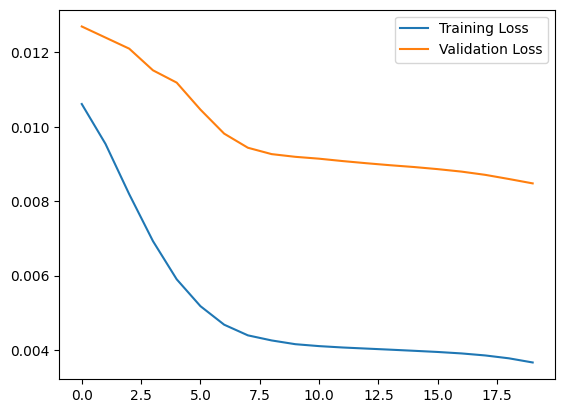

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [18]:
def find_thresholf(model,x_trained_scale):
  reconstructions = model.predict(x_trained_scale)
  reconstructions_error = keras.metrics.msle(reconstructions,x_trained_scale)
  threshold = np.mean(reconstructions_error.numpy()) + np.std(reconstructions_error.numpy())
  return threshold

def get_predictions(model,x_test_scaled,threshold):
  predictions = model.predict(x_test_scaled)
  error = keras.losses.msle(predictions,x_test_scaled)
  anomaly_mask = pd.Series(error) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

In [19]:
threshold = find_thresholf(model,x_trained_scale)
threshold

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


np.float64(0.008076148852117169)

In [20]:
predictions = get_predictions(model,x_test_scaled,threshold)
predictions

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
995    0.0
996    1.0
997    1.0
998    1.0
999    1.0
Length: 1000, dtype: float64

In [21]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.949